In [2]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.image as mpimg
from skimage import data, color, io, filters, morphology,transform, exposure, feature
from scipy import ndimage
from skimage.io import imread, imshow
from sklearn import linear_model, datasets
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA

In [3]:
# Getting train and test data
training_images = [] # empty list
test_images = [] # empty list
y_train = [] # empty list
y_test = [] # empty list

path = "./Faces/Training_images/"
valid_images = [".jpg",".gif",".png"]

for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    training_images.append(imread(os.path.join(path,f),as_gray=True))
    y_train.append(int(f[6:8]))

path = "./Faces/Test_images/"
valid_images = [".jpg",".gif",".png"]
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    test_images.append(imread(os.path.join(path,f),as_gray=True))
    y_test.append(int(f[6:8]))
    
print("training images: ", len(y_train))
print("test images: ", len(y_test))

print("unique persons training set: ", len(set(y_train)))
print("unique persons training set: ", len(set(y_test)))

training images:  500
test images:  250
unique persons training set:  50
unique persons training set:  50


<AxesSubplot:xlabel='y', ylabel='count'>

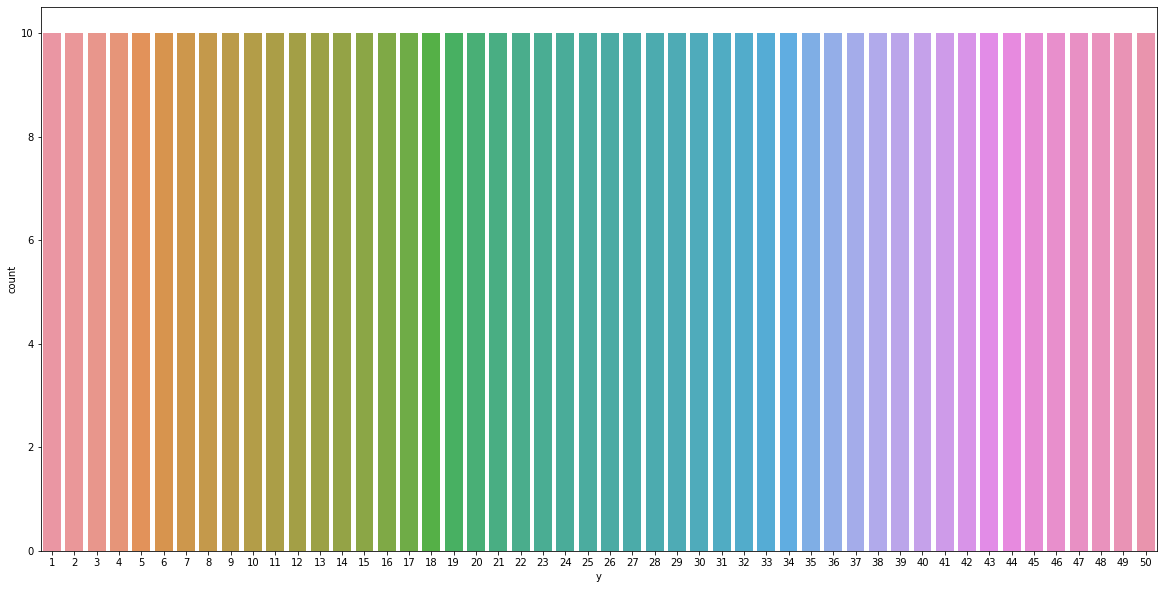

In [4]:
#TRAINSET IS FULLY BALANCED
df=pd.DataFrame(y_train, columns=['y'])
plt.figure(figsize=(20,10))
sns.countplot(x='y', data=df)

<AxesSubplot:xlabel='y', ylabel='count'>

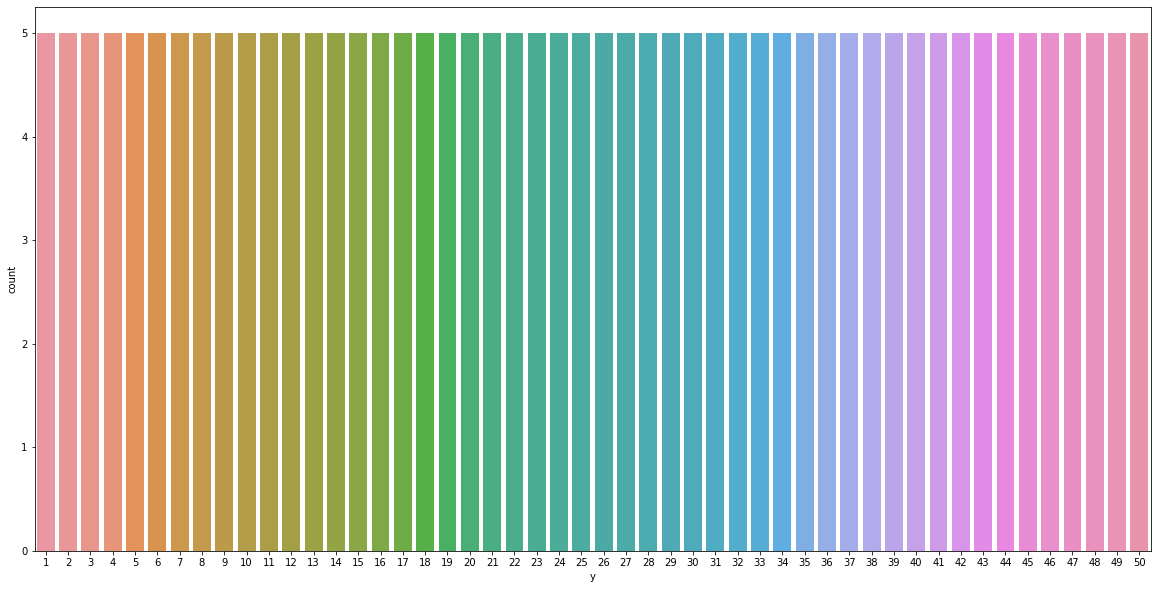

In [5]:
#TESTSET IS FULLY BALANCED
df=pd.DataFrame(y_test, columns=['y'])
plt.figure(figsize=(20,10))
sns.countplot(x='y', data=df)

label:  39


(-0.5, 123.5, 149.5, -0.5)

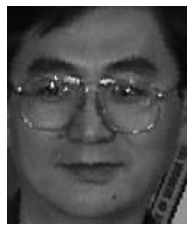

In [6]:
# showing image
image_index = 14
print('label: ',y_train[image_index])
plt.imshow(training_images[image_index],cmap = 'gray')
plt.axis('off')


In [7]:
#Rescaling the images to 150x110
training_images=[transform.resize(training_images[image_nr],(150,110),mode='constant') for image_nr in range(len(training_images))] 
test_images=[transform.resize(test_images[image_nr],(150,110),mode='constant') for image_nr in range(len(test_images))]

In [8]:
#Flatten the dimensions to 1 dimension
X_train = []
X_test = []
    
X_train = [image.flatten() for image in training_images]
X_test = [image.flatten() for image in test_images]  


In [9]:
# Dimensionality reduction: Principle Component Analysis starting of with 40 components
number_of_components = 40

pca_model = PCA(n_components=number_of_components, svd_solver='full')
pca_model.fit(X_train)

X_train_pca = pca_model.transform(X_train)
X_test_pca = pca_model.transform(X_test)

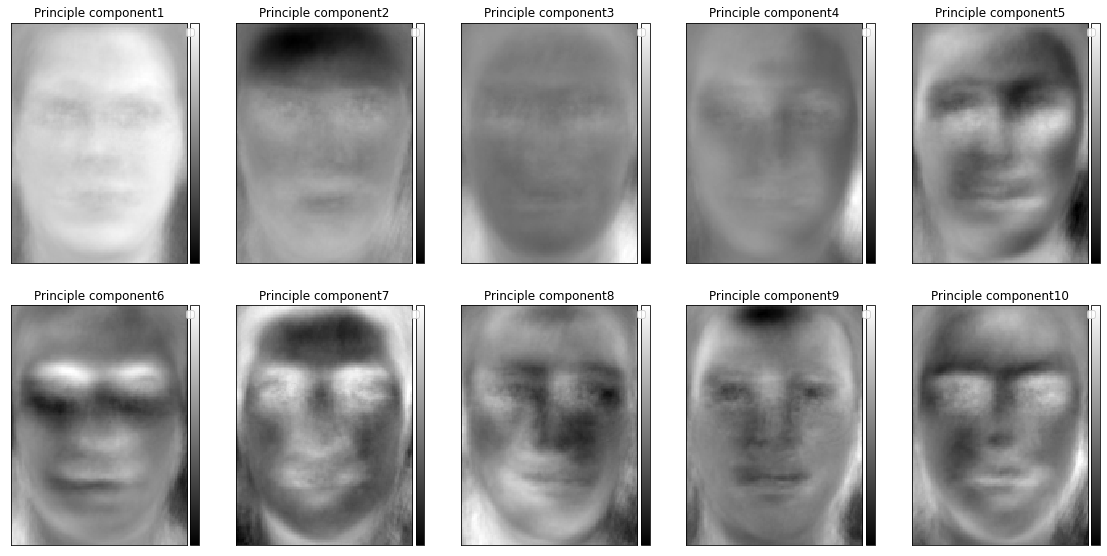

In [10]:
# Visualaise first 10 principle components (eigenfaces)
PCA_components = pca_model.components_

fig = plt.figure(figsize=(16, 9)) 
for i in range(0,10):
    ax = fig.add_subplot(2, 5, i+1)
    imshow(PCA_components[i].reshape((150,110)),cmap='gray')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    plt.axis('off')
    plt.legend('off')
    
    ax.set_title('Principle component'+str(i+1))
    # x and y axis should be equal length
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
plt.show()

#Basis patterns

In [11]:
print(X_train_pca[image_index,:])
#Weights we have to add to every pca to reconstruct our face based on the 40 eigenfaces

[-10.71278277  -0.4656687   -2.04254408  -1.63370983  -0.01733261
  -0.11846941  -1.07922646  -0.92768688   0.32885746   1.90668741
  -4.10036847  -0.37352088   0.56071492  -2.48360456  -0.26017599
  -0.51070545   0.34301854   0.80709527   0.08508148   0.17955725
   1.10883246   0.50023601   1.61109097   0.61984009   1.21511526
   0.91500319   0.42123729   0.33654042  -0.44956869   0.07829997
  -0.6698067    1.0361806    0.69400582  -0.78840541  -0.44941112
   1.34647512  -0.04535784   0.26052374   0.23284263  -0.6239026 ]


In [12]:
#81% of the variance is explained by all the principle components
print(np.sum(pca_model.explained_variance_ratio_))


0.8068217477820613


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
[0.31299019 0.3947984  0.45001934 0.49551253 0.53088251 0.56001625
 0.585277   0.60752005 0.62352158 0.63906729 0.65257835 0.66478699
 0.67516751 0.68517082 0.69396302 0.70178219 0.70902571 0.71574948
 0.72172626 0.72745666 0.73304567 0.73846828 0.74359429 0.7485391
 0.75336793 0.75799737 0.76252784 0.76684348 0.77107789 0.7749051
 0.77869207 0.78238172 0.78587312 0.789223   0.792383   0.79545501
 0.79844999 0.80135248 0.80413568 0.80682175]


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


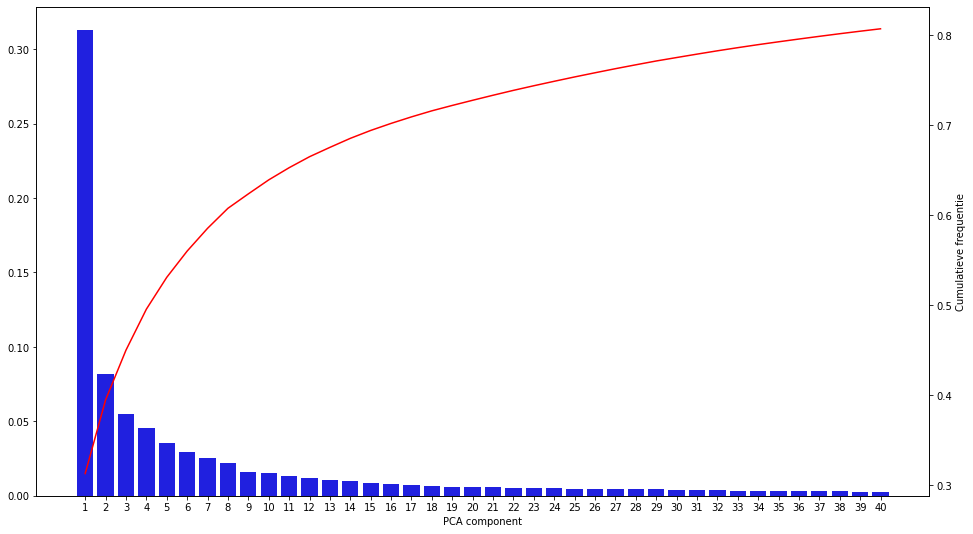

In [13]:
PCAnumber = np.arange(1,number_of_components+1)
print(PCAnumber)
PCA_explained_cumulative = np.cumsum(pca_model.explained_variance_ratio_)
print(PCA_explained_cumulative)

fig = plt.figure(figsize=(16, 9)) 
ax = sns.barplot(PCAnumber,pca_model.explained_variance_ratio_,color='blue')
plt.xlabel('PCA component')
ax2=ax.twinx() # dubbele y-as
ax.yaxis.set_label_position('left')
ax2.yaxis.set_label_position('right')
ax2.set_ylabel('Cumulatieve frequentie')
plt.plot(PCA_explained_cumulative, c='red')

#plotting explained variance in function of each PCA. Shows importance of each PCA

In [14]:
# Scaling the eigenfaces
scaler = preprocessing.StandardScaler().fit(X_train_pca)
X_train_pca = scaler.transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)


In [15]:
from sklearn.svm import SVC
fouten=[]
model = SVC(probability=True,class_weight="balanced")
parameters = {'kernel': ['linear','rbf','poly'],
              'C': uniform(50, 200),
              'gamma': uniform(50, 200)}


n_iter_search = 100


random_search = RandomizedSearchCV(model, param_distributions=parameters,cv=10,n_iter=n_iter_search,n_jobs = 7,verbose=1)

random_search = random_search.fit(X_train_pca, y_train)

best_accuracy = random_search.best_score_ 
best_parameters = random_search.best_params_  

print('Best accuracy : ', random_search.best_score_)
print('Best parameters :',random_search.best_params_  )

y_pred = random_search.predict(X_test_pca)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

#Model does fairly good, We see it struggles with some face like face 4 or 6 but does really good in general
#Ofcourse this isn't the ideal way to do face detection

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best accuracy :  0.89
Best parameters : {'C': 244.15616342400688, 'gamma': 206.0271733303948, 'kernel': 'linear'}
              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       1.00      0.80      0.89         5
           3       0.80      0.80      0.80         5
           4       0.36      0.80      0.50         5
           5       1.00      0.80      0.89         5
           6       0.50      0.60      0.55         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       0.80      0.80      0.80         5
          10       1.00      1.00      1.00         5
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00         5
          13       0.67      0.80      0.73         5
          14       0.57      0.80      0.67         5
          